# Foundations of Computational Economics #33

by Fedor Iskhakov, ANU

<img src="_static/img/dag3logo.png" style="width:256px;">

## Random numbers in Python, Monte Carlo

<img src="_static/img/lecture.png" style="width:64px;">

<img src="_static/img/youtube.png" style="width:65px;">

[https://youtu.be/YX8lPKRETLQ](https://youtu.be/YX8lPKRETLQ)

Description: Random number generation in Python. Inverse transform sampling. Monte Carlo simulations.

### Random numbers and simulation

Has to do with three different fields:

- Theory of probabilities - analysis with known distribution laws  
- Mathematical statistics - analysis of data from unknown distributions  
- Econometrics - application of statistics to economics  

#### Random variables

$$
\tilde{X} = \big( \Omega, \mathfrak{A}, P \big)
$$

- $ \Omega $ set of all outcomes  
- $ \mathfrak{A} $ sigma-algebra of events (subsets of $ \Omega $)  
- $ P $ probability measure over $ \mathfrak{A} $  

#### Discrete random variables

- $ \Omega = \{x_1,\dots,x_n\} $ is finite with $ n $ elements  
- $ \mathfrak{A} $ is set of all subsets of $ \Omega $  
- $ P $ is constructed from $ (p_1,p_2,\dots,p_n) $, such that  


$$
P(A) = \sum_{i: x_i \in A} p_i \text{ for all } A \in \mathfrak{A}
$$

$ F(x) = P(\{\tilde{X} \le x\}) $ cumulative distribution function, stepwise constant, discontinuous

#### Continuous random variables

- $ \Omega $ is subset of $ \mathbb{R} $  
- $ \mathfrak{A} $ is Borel set on $ \Omega $  
- $ P([a,b]) = F(b) - F(a) $  


$$
F(x) = \int_{-\infty}^x f(t) dt
$$

- $ F(x) = P(\{\tilde{X} \le x\}) $ cumulative distribution function, continuous  
- $ f(x) $ probability density function  

#### Moments of random variables

- First, mean, measure of *central tendency*  


$$
E(\tilde{X}) = \int_{\Omega} x \,dF(x) = \int_{\Omega} x f(x) \,dx \quad\text{or}\quad =\sum_{i=1}^{n} x_i p_i
$$

- Second central, variance, measure of *variability*  


$$
D(\tilde{X}) = V(\tilde{X}) = Var (\tilde{X}) = E\big(\tilde{X}- E(\tilde{X})\big)^2
$$

- Standard deviation = square root of variance (same units as mean)  

#### Random sample

Realizations of a random variable $ \tilde{X} $ drawn independently one by one

$$
\{x_1,x_2,\dots,x_n\} \sim F_{\tilde{X}}(x)
$$

#### Simulation $ \sim $ Random sample

- simulation of the random variable is the same as random sampling  
- economic model (with shocks), as a function of the random variable, is a random variable itself  
- the complex induced distribution can be studied by simulation *of the model*  
- parameters of the model alter the model induced distribution  

### Generating random numbers

Every language has a **rand()** function that generates uniform number
on $ [0,1] $

In fact, **pseudo-random number generator**, i.e. deterministic
algorithm that returns a sequence of numbers that look close enough to
being random

- must be fast  
- must have large periodicity  
- must satisfy a battery of statistical tests for independence and stationarity  

#### Random draws pictured

<img src="_static/img/randbitmap_computer.png" style="width:600px;">

#### True random number generators

Use physical processes as origin for randomness (RANDOM.ORG, hardware
RNGs)

Pseudo random number generator state may be initiated by true source of
randomness

- thermal noise  
- electrical noise  

#### True random draws pictured

<img src="_static/img/randbitmap_true.png" style="width:600px;">

#### Random generators in Python

Modules:
- **random** - basic functionality, scalar numbers
- **NumPy.random** - vectorized, many distributions
- **SciPy.stat** - more probability and statistics functions

**x=random.random()** uniform on $ [0,1] $

In [1]:
# Simulating a scalar random variable (one by one or in bulk)
import random
x = [random.random() for i in range(100)]
print(*x[:10],sep='\n')

0.8690403189679852
0.28448521818295114
0.8788509782317052
0.20669232697232354
0.23700439500605064
0.9460567759288859
0.6640385599318106
0.9984589701093647
0.26340174952872
0.323685917159096


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def hist(data,bins='auto',range=None,theoretical=None,cdf=False):
    '''Draws histogram of data, imposes a theoretical distribution if given'''
    fig, ax = plt.subplots(figsize=(10,6))
    if cdf:
        # plot CDF instead of histogram
        plt.hist(data,bins=len(data),range=range,cumulative=True,density=True,align='right',histtype='step',color='black')
    else:
        plt.hist(data,bins=bins,range=range,density=True,histtype='bar',color='lightgrey',edgecolor='k')
    if theoretical and len(data)>0:
        # add theoretical distribution
        x = (np.linspace(range[0],range[-1],100) if range else np.linspace(min(data),max(data),100))
        y = theoretical(x)
        plt.plot(x,y,'r-')

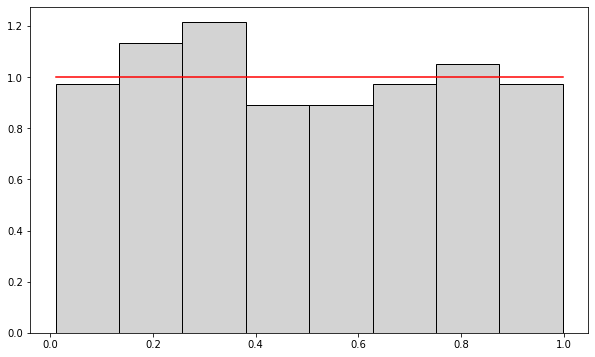

In [3]:
import scipy.stats
hist(x,theoretical=scipy.stats.uniform.pdf)

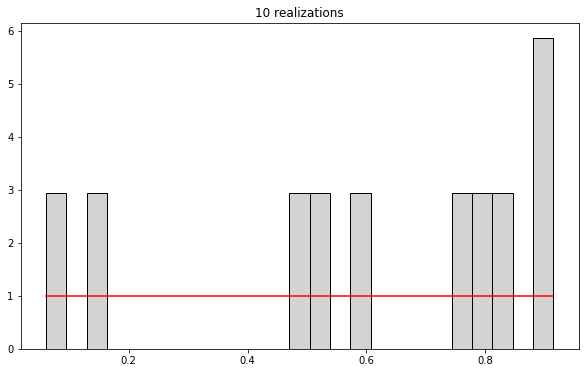

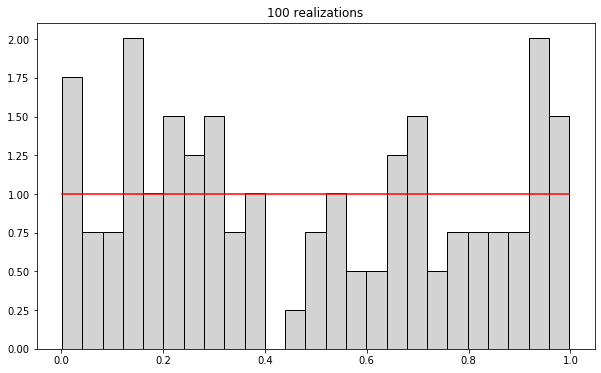

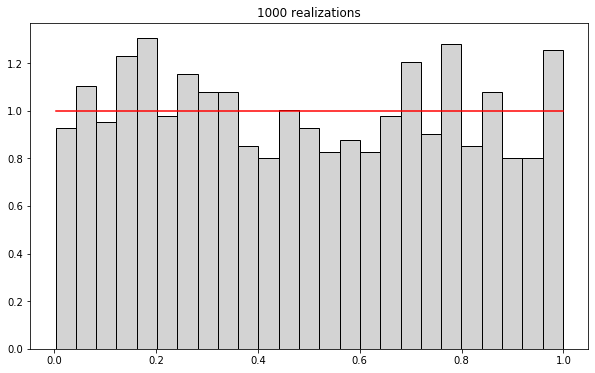

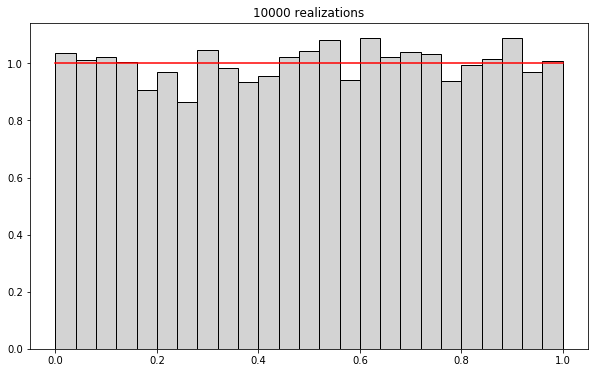

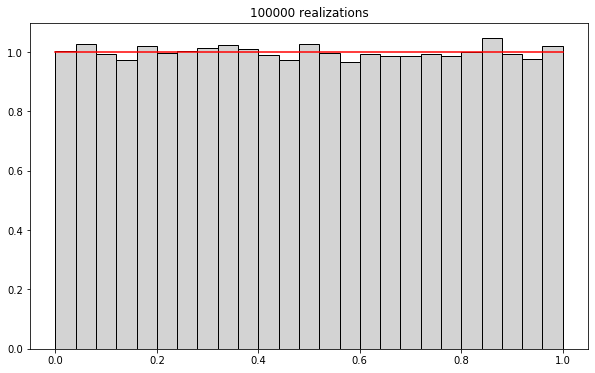

In [4]:
for i in range(1,6):
    n=10**i
    data = np.random.random(n) #NumPy
    hist(data,bins=25,theoretical=scipy.stats.uniform.pdf)
    plt.title('%d realizations'%n)

#### Other distributions

- Normal  
- Log-normal  
- Exponential  
- Fisher  
- $ \chi^2 $-distribution  


and many other

[https://numpy.org/doc/stable/reference/random/generator.html](https://numpy.org/doc/stable/reference/random/generator.html)

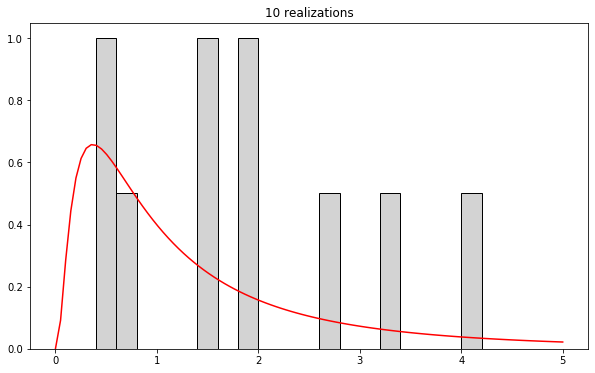

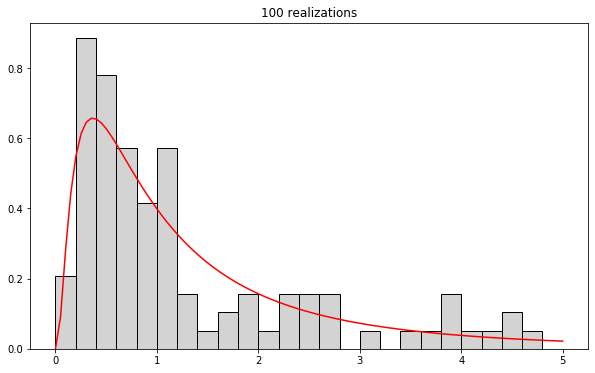

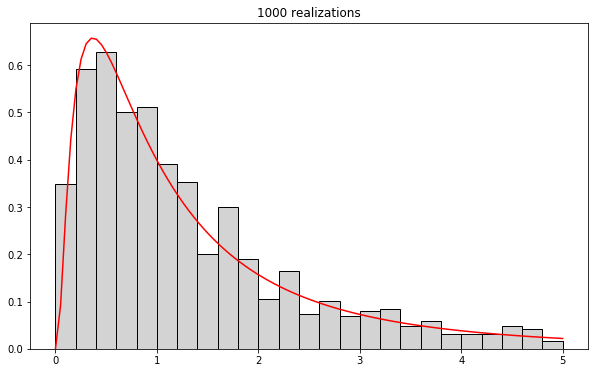

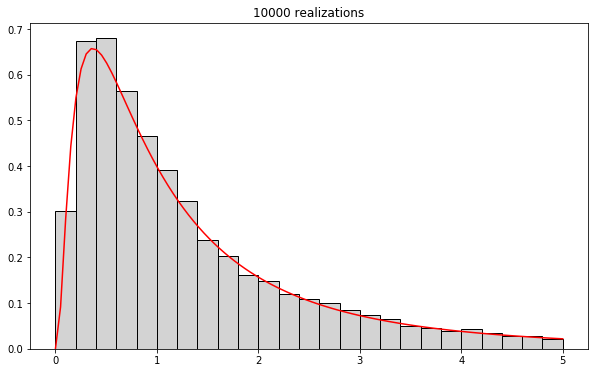

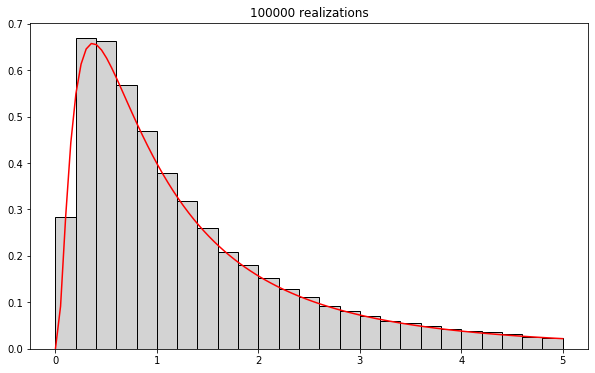

In [5]:
for i in range(1,6):
    n=10**i
    data = np.random.lognormal(size=n)
    hist(data,bins=25,range=(0,5),theoretical=lambda x: scipy.stats.lognorm.pdf(x,1.0))
    plt.title('%d realizations'%n)

#### Simulating from any probability distribution

- Inverse transform sampling  
- Accept-reject method (Rejection sampling)  
- [Ziggurat algorithm](https://en.wikipedia.org/wiki/Ziggurat_algorithm)  

#### Inverse transform sampling

Let $ F(x) $ be cdf of the random variable of interest
$ \tilde{X} $, with inverse $ F^{(-1)}(x) $

To simulate $ \tilde{X} $:

1. simulate $ (u_1,\dots,u_n) $ from standard uniform distribution  
1. return $ \big( F^{(-1)}(u_1),\dots,F^{(-1)}(u_n) \big) $  

Let $ \tilde{X} = F^{(-1)}(\tilde{U}) $, and denote its cdf $ F_{\tilde{X}}(x) $.

Also let $ F_{U}(x) = \min(\max(0,U),1) $ denote cdf of standard uniform distribution.
Then

$$
F_{\tilde{X}}(x) = P(\{ \tilde{X} \le x \}) = P(\{ F^{(-1)}(\tilde{U}) \le x \}) =
$$

$$
= P(\{ \tilde{U} \le F(x) \}) = F_U \big(F(x)\big) = F(x)
$$

#### Inverse CDF

<img src="_static/img/invcdf.png" style="width:600px;">

#### Example: Gumbel (Extreme value type I) distribution

$$
F(x) = \exp \big( -\exp (-\frac{x-\mu}{\beta} ) \big)
$$

$$
F^{-1}(x) = \mu - \beta \log( -\log(x))
$$

#### Repeatability of simulations

- Sometimes it is important to be able to repeat the simulation’s random number sequence  
- There are ways to control the psuedo-random number generator state  


`seed()`

`get_state()`

`set_state()`

### Monte Carlo method

Solving deterministic problems using random numbers

Example: Compute $ \pi $

Approach:

<img src="_static/img/pimc.jpg" style="">

In [6]:
def pimc(n=100):
    '''Compute pi using Monte Carlo with sample size n'''
    d = np.random.uniform(size=(2,int(n)))
    d2 = np.sum(d**2,axis=0)
    n1 = np.sum(d2<1)
    s4 = n1/n
    return 4*s4

d = pimc(n=1e6)
print('Estimate of pi is %1.5f, bias %1.3e'%(d,d-np.pi))

Estimate of pi is 3.14231, bias 7.193e-04


In [7]:
data=[]
for i in range(8):
    n = 10**i
    d = pimc(n)
    print('Estimate of pi is %1.5f, %1.0e points, bias %1.3e'%(d,n,d-np.pi))

Estimate of pi is 0.00000, 1e+00 points, bias -3.142e+00
Estimate of pi is 3.60000, 1e+01 points, bias 4.584e-01
Estimate of pi is 3.12000, 1e+02 points, bias -2.159e-02
Estimate of pi is 3.21600, 1e+03 points, bias 7.441e-02
Estimate of pi is 3.13640, 1e+04 points, bias -5.193e-03
Estimate of pi is 3.13528, 1e+05 points, bias -6.313e-03
Estimate of pi is 3.14154, 1e+06 points, bias -5.265e-05


Estimate of pi is 3.14217, 1e+07 points, bias 5.765e-04


Estimate of pi is 3.14152, bias -7.505e-05


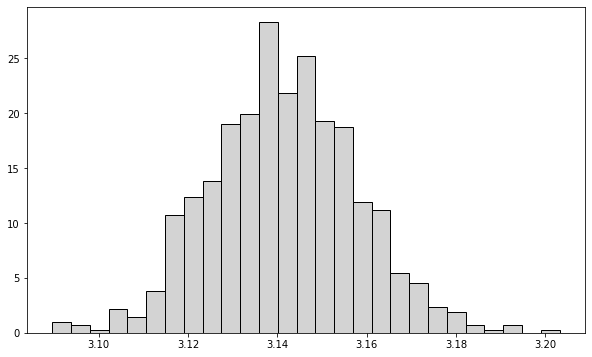

In [8]:
data=[]
for i in range(1000):
    data.append(pimc(n=10000))
hist(data)
d = np.mean(data)
print('Estimate of pi is %1.5f, bias %1.3e'%(d,d-np.pi))

#### Thought on Monte Carlo

- Convergence is slow  
- Fitted for some tasks better than for other  
  
  1. Simulating random variables with complex distributions (economic models)  
  1. Testing econometric procedures and estimators  
  1. Computing high dimensional integrals  
  1. Reducing computational load for very hard problems by randomization  

#### Monte Carlo assistant for analytic proofs

1. Assume some non-informative initial distributions for all parameters in the proposition (uniform with wide bounds usually)  
1. Generate a *large* number of parameter vectors  
1. Check if a theoretical proposition is true or not.  
1. Analyze the patterns of parameters when the proposition does or does not hold (sometime finding just a single counter example is sufficient)  

#### Example

Let $ f(x) = x ^ k $ and
$ g(x) = 1 + \frac{1}{k}\cos(2 \pi x) $.

*Proposition:* $ g(x)>f(x) $ on $ [0,1] $ for all
$ k \ge 1.5 $?

More broadly, what are the values of $ k $ when the inequality holds?

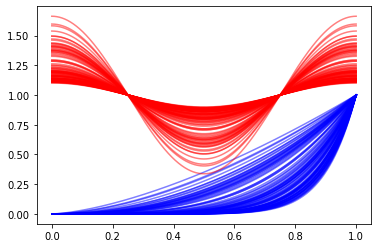

The simulated proposition is: False
Failing values of k: [1.50971988]


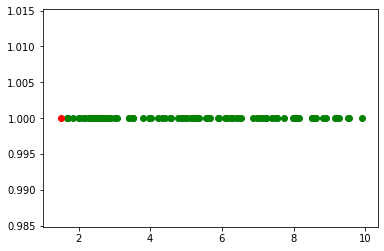

In [9]:
x = np.linspace(0,1,1000).reshape([-1,1]) # space for check points on [0,1], column
N = 100 # number of random draws of parameters
k = np.random.uniform(low=1.5,high=10,size=N)  # generate k
f = x ** k
g = 1 + np.cos(x*2*np.pi) / k

# plot the functions
fig, ax = plt.subplots()
ax.plot(x,f,color='b',alpha=0.5)
ax.plot(x,g,color='r',alpha=0.5)
plt.show()

check = np.array(np.all(g>f,axis=0)) # simulate the proposition
fk = k[np.logical_not(check)]
answer = np.all(check)
print('The simulated proposition is:',answer)
if not answer:
    print('Failing values of k:',fk,sep=' ')

# plot the functions
fig, ax = plt.subplots()
ax.scatter(k[check],np.ones(k[check].shape),color='g')
ax.scatter(fk,np.ones(fk.shape),color='r')
plt.show()

Conclusion: Even though with relatively low $ N=100 $ the statement may
seem to be correct (depending on the lowest realized $ k $), running more
simulations, for example, $ N=500 $, reveals that there are values of
$ k $ close to 1.5 where the statement is incorrect.
Running even more simulations may help to establish an approximate threshold
somewhat above 1.5, such that for $ k $ above the threshold, the inequality
is true.

### Further learning resources

- Docs on **SciPy.random**
  [https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)  
- Docs on **SciPy.stats**
  [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)  
- Random number generators [https://www.random.org/analysis](https://www.random.org/analysis)  
- 📖 Kevin Sheppard “Introduction to Python for Econometrics, Statistics and Data Analysis.” *Chapter: 19*  